In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
dados = {
    'salario':[[100],[200],[500],[900],[1400],[1500],[2500],[2800],[3500],[3700],[3800]],
    'idade':[[10],[12],[14],[16],[17],[20],[21],[22],[30],[32],[35]]
}

In [3]:
X = dados['idade']
y = dados['salario']

Text(0.5, 1.0, 'Dados antes do treino')

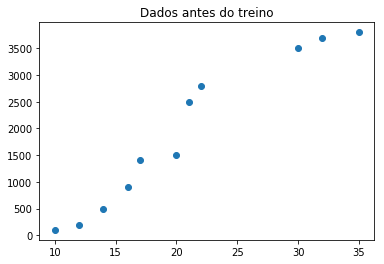

In [4]:
plt.scatter(X,y)
plt.title("Dados antes do treino")

In [5]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
lm.score(X,y)

0.935767969132932

In [7]:
lm.intercept_

array([-1531.38801262])

In [8]:
lm.coef_

array([[164.82649842]])

In [9]:
#Previsão quando a pessoa tiver 40 anos

ynew = lm.intercept_ + lm.coef_*40
ynew

array([[5061.67192429]])

In [10]:
#ou podemos fazer a previsao usando o "predict" do sklearn

prev = lm.predict([[40]])

prev

array([[5061.67192429]])

In [11]:
# comparar os valores previstos com os valores reais

prev_t = lm.predict(X)
prev_t

array([[ 116.87697161],
       [ 446.52996845],
       [ 776.1829653 ],
       [1105.83596215],
       [1270.66246057],
       [1765.14195584],
       [1929.96845426],
       [2094.79495268],
       [3413.40694006],
       [3743.05993691],
       [4237.53943218]])

In [12]:
#Erro
erro = y - prev_t
abs(erro)

array([[ 16.87697161],
       [246.52996845],
       [276.1829653 ],
       [205.83596215],
       [129.33753943],
       [265.14195584],
       [570.03154574],
       [705.20504732],
       [ 86.59305994],
       [ 43.05993691],
       [437.53943218]])

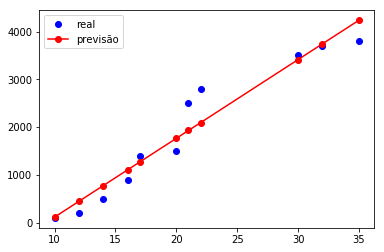

In [13]:
plt.plot(X,y,'ob',label='real')
plt.plot(X,prev_t,'o-r',label='previsão')
plt.legend()

In [14]:
xnew = np.arange(10,32,2)
ynew = lm.intercept_ + lm.coef_*xnew

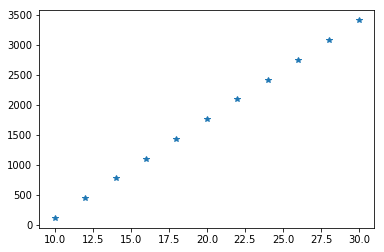

In [15]:
plt.plot(xnew,ynew[0],'*')

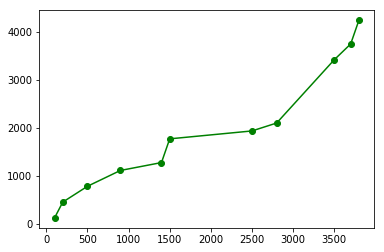

In [16]:
plt.plot(y,prev_t,'o-g')
# quanto mais "reto" ficar esses dados de y e yprevisto, mais coerente está o modelo com o real

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,# 30% dos dados ficarão fora do treino
    #random_state=42,
)

In [19]:
lmnew = LinearRegression()
lmnew.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lmnew.predict([[40]]) # Compare com o resultado sem tirar valores de test

array([[4899.80523094]])

In [21]:
lmnew.score(X_train,y_train)

0.9409610009391147

In [22]:
lmnew.score(X_test,y_test)

0.9112151262534149

In [23]:
prev_teste = lmnew.predict(X)

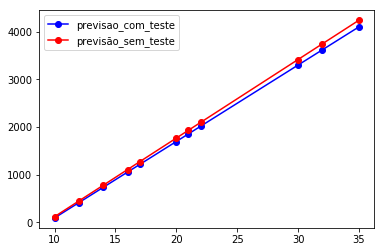

In [24]:
plt.plot(X,prev_teste,'o-b',label='previsao_com_teste')
plt.plot(X,prev_t,'o-r',label='previsão_sem_teste')
plt.legend()

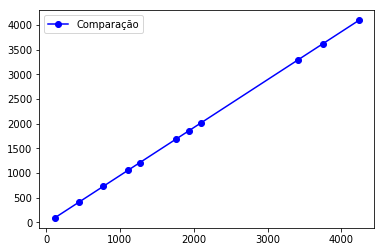

In [26]:
plt.plot(prev_t,prev_teste,'o-b',label='Comparação')
plt.legend()


In [28]:
error_new = prev_t - prev_teste
error_new

array([[ 25.9198208 ],
       [ 34.98294564],
       [ 44.04607047],
       [ 53.10919531],
       [ 57.64075773],
       [ 71.23544498],
       [ 75.7670074 ],
       [ 80.29856982],
       [116.55106917],
       [125.614194  ],
       [139.20888126]])